In [1]:
import os

import numpy as np
import pandas as pd
import xarray as xr

import seaborn as sns
import geopandas as gpd

from shapely.geometry import Point

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

In [3]:
yy_s, yy_e = 2002, 2023
years_num = yy_e - yy_s + 1

npix = 2
acf = 'mar'
cor = 'pearson'

In [7]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite','5_DOWN')

In [8]:
CHIRPS_dir = os.path.join(dir_base, f'ITALY_DOWN_CHIRPS_1dy_{yy_s}_{yy_e}_npix_{npix}_thr_1_acf_{acf}_genetic_{cor}.nc')
IMERG_dir = os.path.join(dir_base, f'ITALY_DOWN_IMERG_1dy_{yy_s}_{yy_e}_npix_{npix}_thr_1_acf_{acf}_genetic_{cor}.nc')
CMORPH_dir = os.path.join(dir_base, f'ITALY_DOWN_CMORPH_3h_{yy_s}_{yy_e}_npix_{npix}_thr_1_acf_{acf}_genetic_{cor}_corrected.nc')
ERA5_dir = os.path.join(dir_base, f'ITALY_DOWN_ERA5_3h_{yy_s}_{yy_e}_npix_{npix}_thr_1_acf_{acf}_genetic_{cor}.nc')
MSWEP_dir = os.path.join(dir_base, f'ITALY_DOWN_MSWEP_3h_{yy_s}_{yy_e}_npix_{npix}_thr_1_acf_{acf}_genetic_{cor}.nc')
GSMaP_dir = os.path.join(dir_base, f'ITALY_DOWN_GSMaP_3h_{yy_s}_{yy_e}_npix_{npix}_thr_1_acf_{acf}_genetic_{cor}.nc')

In [49]:
DATA = xr.open_dataset(CHIRPS_dir)
DATA['Mev_d'][:, 14, 40] = np.nan

lon2d_CH, lat2d_CH = np.meshgrid(DATA['lon'].values, DATA['lat'].values)

CHIRPS_Mevd = DATA.Mev_d
DATA.Tr

<xarray.DataArray 'Tr' (Tr: 6)> Size: 48B
array([  5.,  10.,  20.,  50., 100., 200.])
Coordinates:
  * Tr       (Tr) float64 48B 5.0 10.0 20.0 50.0 100.0 200.0

In [32]:
DATA = xr.open_dataset(IMERG_dir)

Tr = DATA.Tr[3]
lon2d_IM, lat2d_IM = np.meshgrid(DATA['lon'].values, DATA['lat'].values)

IMERG_Mevd = DATA.Mev_d
DATA.Tr

<xarray.DataArray 'Tr' (Tr: 6)> Size: 48B
array([  5,  10,  20,  50, 100, 200])
Coordinates:
  * Tr       (Tr) int64 48B 5 10 20 50 100 200

In [28]:
DATA = xr.open_dataset(CMORPH_dir)

lon2d_CM, lat2d_CM = np.meshgrid(DATA['lon'].values, DATA['lat'].values)

CMORPH_Mevd = DATA.Mev_d
DATA.Tr

<xarray.DataArray 'Tr' (Tr: 6)> Size: 48B
array([  5,  10,  20,  50, 100, 200])
Coordinates:
  * Tr       (Tr) int64 48B 5 10 20 50 100 200

In [29]:
DATA = xr.open_dataset(ERA5_dir)

lon2d_ER, lat2d_ER = np.meshgrid(DATA['lon'].values, DATA['lat'].values)

ERA5_Mevd = DATA.Mev_d
DATA.Tr

<xarray.DataArray 'Tr' (Tr: 6)> Size: 48B
array([  5,  10,  20,  50, 100, 200])
Coordinates:
  * Tr       (Tr) int64 48B 5 10 20 50 100 200

In [30]:
DATA = xr.open_dataset(GSMaP_dir)

lon2d_GS, lat2d_GS = np.meshgrid(DATA['lon'].values, DATA['lat'].values)

GSMaP_Mevd = DATA.Mev_d
DATA.Tr

<xarray.DataArray 'Tr' (Tr: 6)> Size: 48B
array([  5,  10,  20,  50, 100, 200])
Coordinates:
  * Tr       (Tr) int64 48B 5 10 20 50 100 200

In [31]:
DATA = xr.open_dataset(MSWEP_dir)

lon2d_MS, lat2d_MS = np.meshgrid(DATA['lon'].values, DATA['lat'].values)

MSWEP_Mevd = DATA.Mev_d
DATA.Tr

<xarray.DataArray 'Tr' (Tr: 6)> Size: 48B
array([  5,  10,  20,  50, 100, 200])
Coordinates:
  * Tr       (Tr) int64 48B 5 10 20 50 100 200

In [53]:
CHIRPS_Mevd.max()

<xarray.DataArray 'Mev_d' ()> Size: 8B
array(867.69462733)

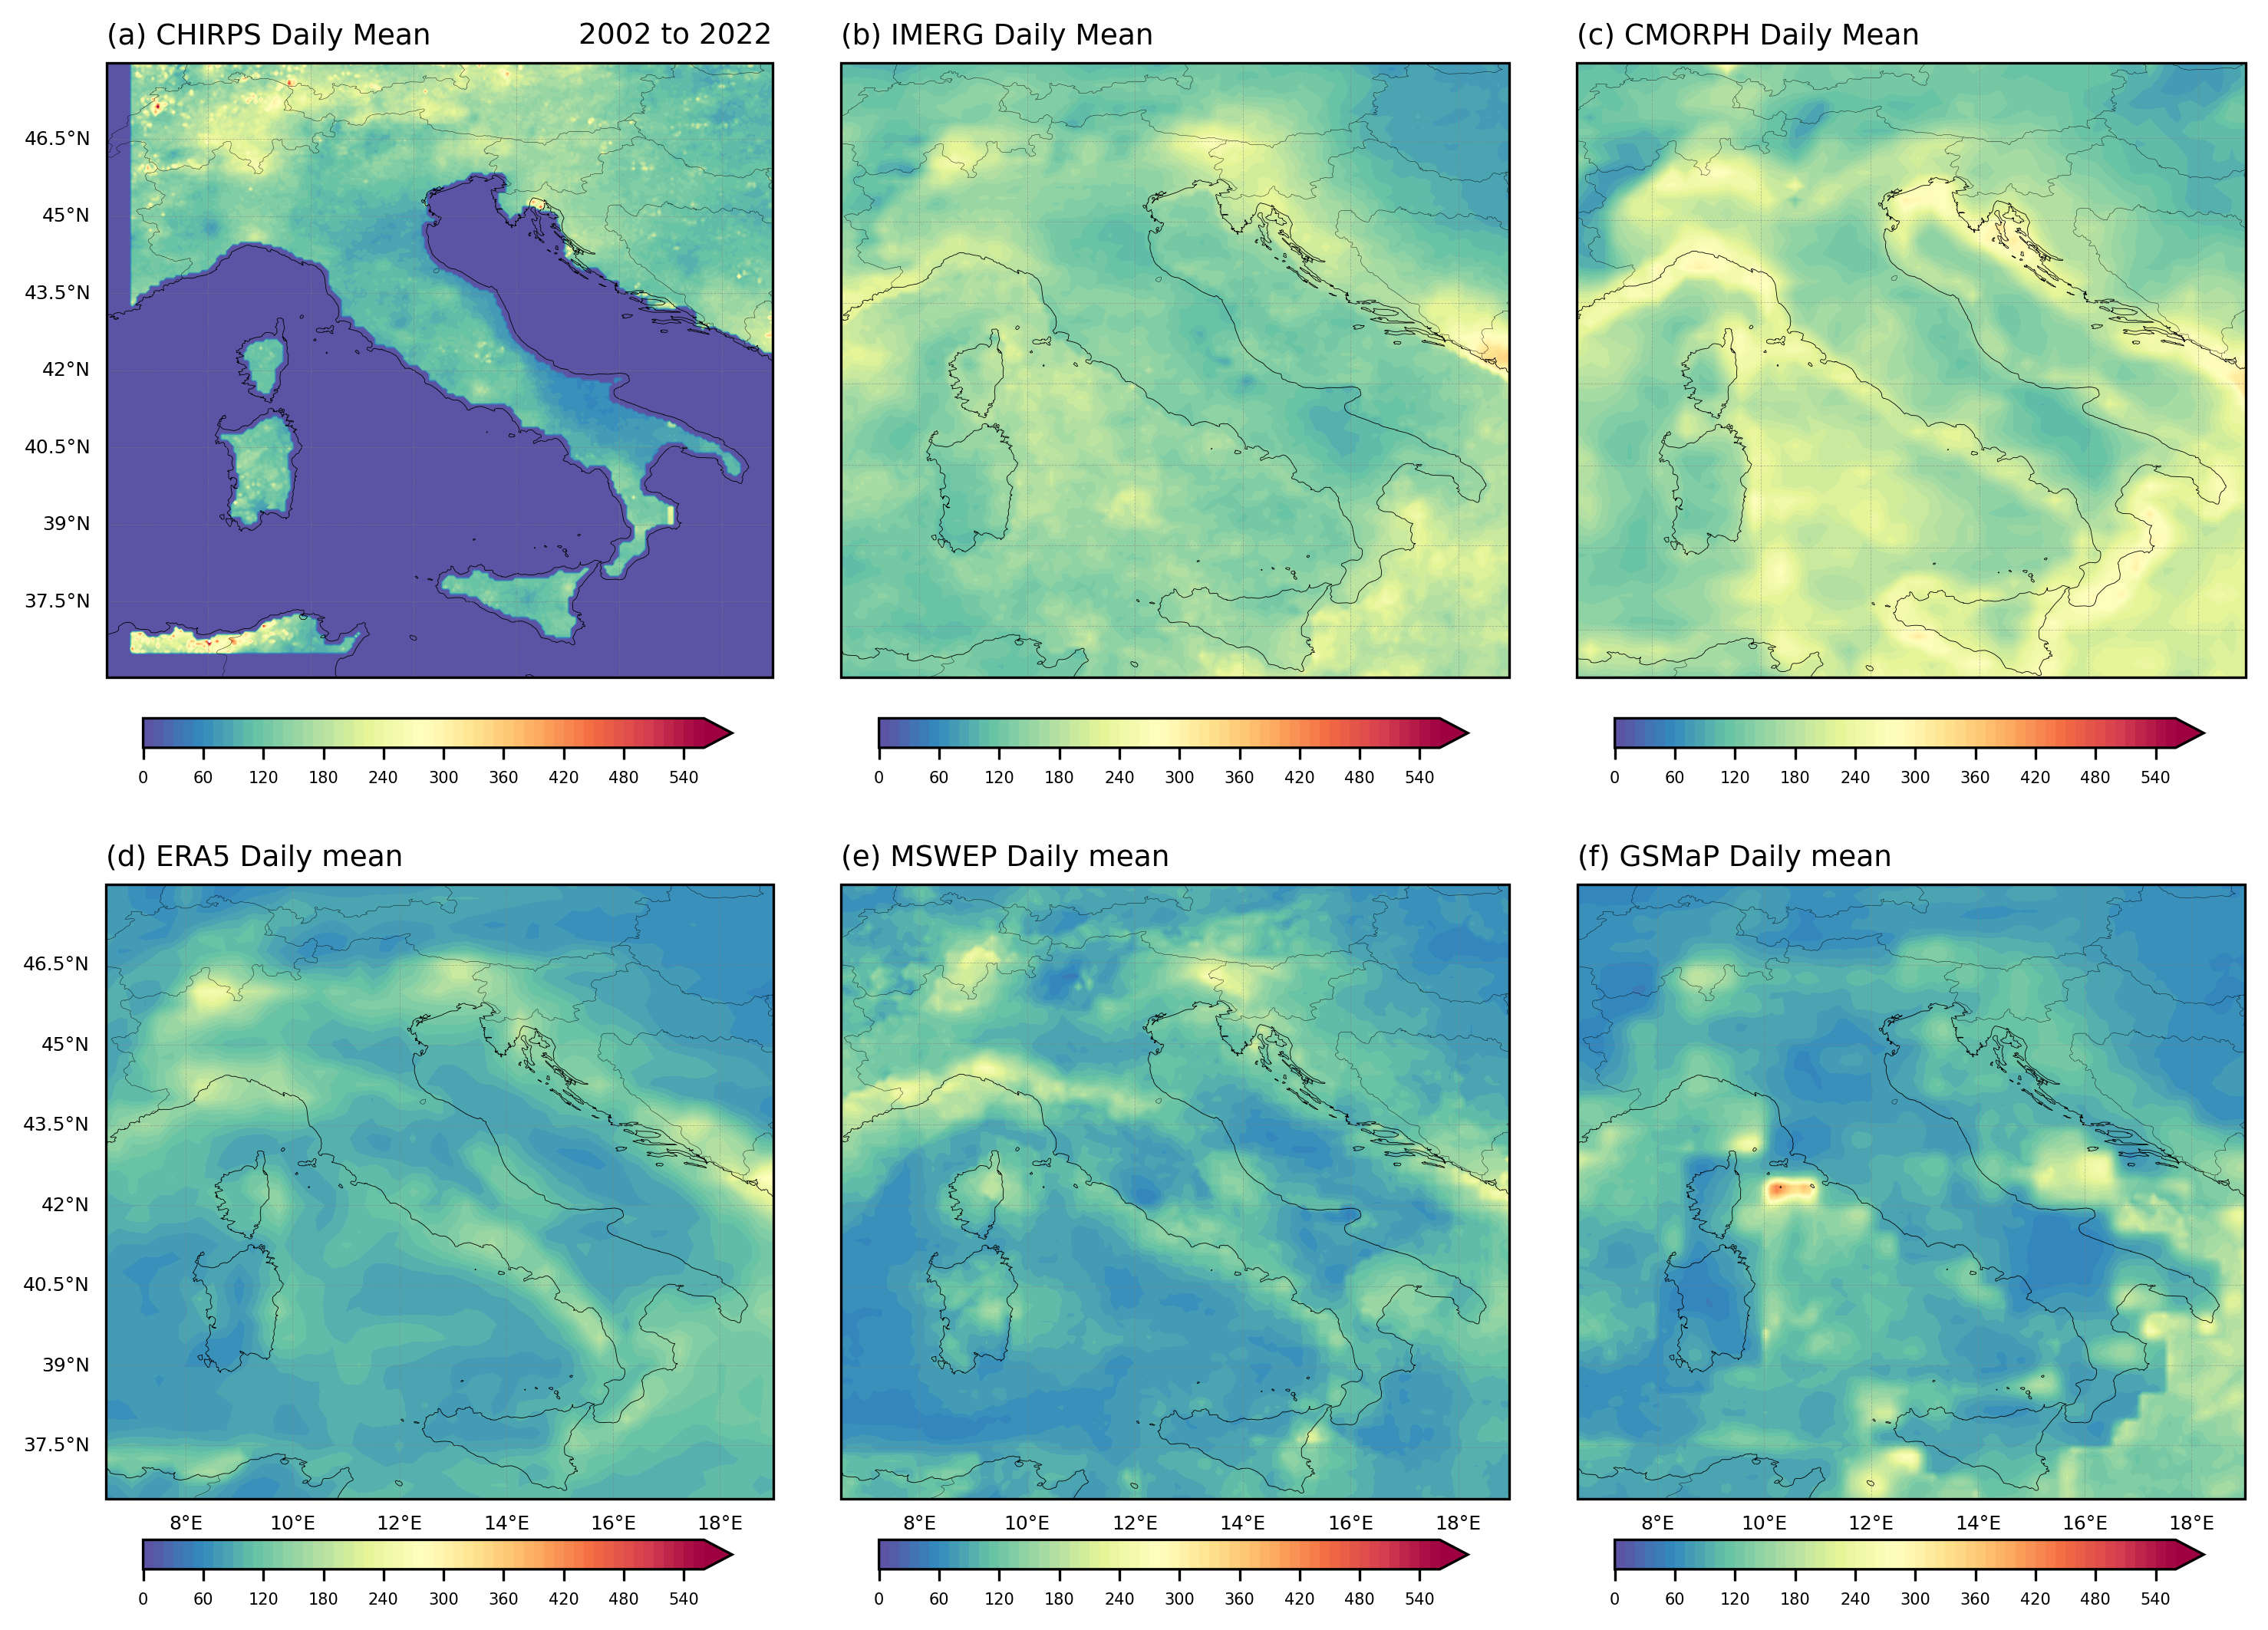

In [57]:
levels = np.arange(0,570,10)
# levels = None

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(12,8.5),dpi=300)
gs = gridspec.GridSpec(2,3)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')
# veneto_shp.plot(ax=ax1, edgecolor='k', facecolor='None', linewidth=0.3, zorder=4)

a1 = ax1.contourf(lon2d_CH, lat2d_CH, CHIRPS_Mevd[3,:,:], cmap=cmap, levels=levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

ax1.set_title('(a) CHIRPS Daily Mean', loc='left', fontsize=9)
ax1.set_title('2002 to 2022', loc='right', fontsize=9)

cbar = plt.colorbar(a1, fraction=0.043, pad=0.06, orientation='horizontal')
cbar.ax.tick_params(labelsize=5)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')
# veneto_shp.plot(ax=ax1, edgecolor='k', facecolor='None', linewidth=0.3, zorder=4)

a1 = ax1.contourf(lon2d_IM, lat2d_IM, IMERG_Mevd[3,:,:], cmap=cmap, levels=levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

ax1.set_title('(b) IMERG Daily Mean', loc='left', fontsize=9)

cbar = plt.colorbar(a1, fraction=0.043, pad=0.06, orientation='horizontal')
cbar.ax.tick_params(labelsize=5)

# ============================================================================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')
# veneto_shp.plot(ax=ax1, edgecolor='k', facecolor='None', linewidth=0.3, zorder=4)

a1 = ax1.contourf(lon2d_CM, lat2d_CM, CMORPH_Mevd[3,:,:], cmap=cmap, levels=levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = False
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

ax1.set_title('(c) CMORPH Daily Mean', loc='left', fontsize=9)

cbar = plt.colorbar(a1, fraction=0.043, pad=0.06, orientation='horizontal')
cbar.ax.tick_params(labelsize=5)

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')
# veneto_shp.plot(ax=ax1, edgecolor='k', facecolor='None', linewidth=0.3, zorder=4)

a1 = ax1.contourf(lon2d_ER, lat2d_ER, ERA5_Mevd[3,:,:], cmap=cmap, levels=levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = True
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

ax1.set_title('(d) ERA5 Daily mean', loc='left', fontsize=9)

cbar = plt.colorbar(a1, fraction=0.043, pad=0.06, orientation='horizontal')
cbar.ax.tick_params(labelsize=5)

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')
# veneto_shp.plot(ax=ax1, edgecolor='k', facecolor='None', linewidth=0.3, zorder=4)

a1 = ax1.contourf(lon2d_MS, lat2d_MS, MSWEP_Mevd[3,:,:], cmap=cmap, levels=levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

ax1.set_title('(e) MSWEP Daily mean', loc='left', fontsize=9)

cbar = plt.colorbar(a1, fraction=0.043, pad=0.06, orientation='horizontal')
cbar.ax.tick_params(labelsize=5)

# ============================================================================================================================
ax1 = plt.subplot(gs[1, 2], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.2, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')
# veneto_shp.plot(ax=ax1, edgecolor='k', facecolor='None', linewidth=0.3, zorder=4)

a1 = ax1.contourf(lon2d_GS, lat2d_GS, GSMaP_Mevd[3,:,:], cmap=cmap, levels=levels, extend='max')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

ax1.set_title('(f) GSMaP Daily mean', loc='left', fontsize=9)

cbar = plt.colorbar(a1, fraction=0.043, pad=0.06, orientation='horizontal')
cbar.ax.tick_params(labelsize=5)

# ============================================================================================================================
plt.subplots_adjust(hspace=0.01,wspace=0.05)

# cbar_ax = fig.add_axes([0.91, 0.144, 0.025, 0.7])#0.91
# cbar = plt.colorbar(a1, cax=cbar_ax, orientation='vertical')
# cbar.ax.tick_params(labelsize=9)
# cbar.ax.set_ylabel('mm/day', rotation=270)
# cbar.ax.get_yaxis().labelpad = 15

# ============================================================================================================================
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.2, wspace=0.1)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)
